In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('./CSV_Files/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


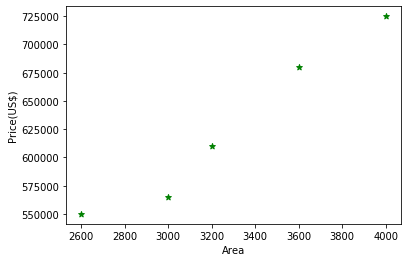

In [3]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price(US$)')
plt.scatter(df.area,df.price, color = 'green', marker='*')

1st create and object for linear regression and then fit the data. Fitting the data means thaining the data with available data points.

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)    # This linear regression model is ready to predict the prices.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
reg.predict([[4000]])

array([723767.12328767])

## Enternal Calculations

In [6]:
# Value of slop/coefficient
reg.coef_

array([135.78767123])

In [7]:
# Value of intersection
reg.intercept_

180616.43835616432

Now we can easily predict using **y = mx+c** equation.

In [8]:
135.78767123*3300+180616.43835616432

628715.7534151643

## Predict for a list of data

In [11]:
d = pd.read_csv('./CSV_Files/areas.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [12]:
price=reg.predict(d)

In [13]:
d['price']=price

In [14]:
d

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
#Makeing a csv file
d.to_csv('prediction.csv', index = False)

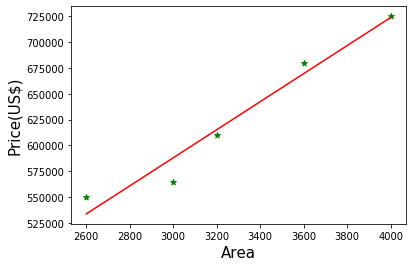

In [16]:
# Show pediced price in a graph
plt.xlabel('Area', fontsize=15)
plt.ylabel('Price(US$)', fontsize=15)
plt.scatter(df.area,df.price, color = 'green', marker='*')

plt.plot(df.area, reg.predict(df[['area']]), color='red')

## Predict the income per capita in canada in 2020

In [19]:
income_data = pd.read_csv("./CSV_Files/canada_per_capita_income.csv")
income_data.head()

,year,per_capita_income_USD
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


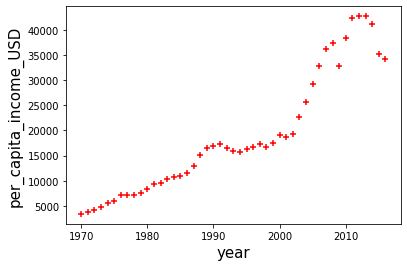

In [20]:
#Plot the data

plt.ylabel('per_capita_income_USD',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.scatter(income_data['year'],income_data['per_capita_income_USD'], marker="+", color ='red')

In [21]:
#Fit the data
reg.fit(income_data[['year']], income_data.per_capita_income_USD)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
reg.predict([[2020]])

array([41288.69409442])

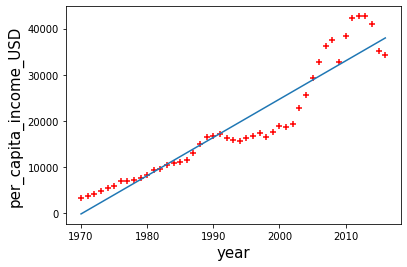

In [23]:
#Plot predicted income
plt.ylabel('per_capita_income_USD',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.scatter(income_data['year'],income_data['per_capita_income_USD'], marker="+", color ='red')
plt.plot(income_data.year, reg.predict(income_data[['year']]))